<a href="https://colab.research.google.com/github/Shrinu97/Machine-learning_codes/blob/main/Student_grade_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

In [2]:
uploaded=files.upload()

Saving student-mat.csv to student-mat.csv


There are 33 columns:

school: student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex: student's sex (binary: 'F' - female or 'M' - male)

age: student's age (numeric: from 15 to 22)

address: student's home address type (binary: 'U' - urban or 'R' - rural)

famsize: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

Fedu: father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

Mjob: mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob: father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason: reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian: student's guardian (nominal: 'mother', 'father' or 'other')

traveltime: home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures: number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup: extra educational support (binary: yes or no)

famsup: family educational support (binary: yes or no)

paid: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities: extra-curricular activities (binary: yes or no)

nursery: attended nursery school (binary: yes or no)

higher: wants to take higher education (binary: yes or no)

internet: Internet access at home (binary: yes or no)

romantic: with a romantic relationship (binary: yes or no)

famrel: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime: free time after school (numeric: from 1 - very low to 5 - very high)

goout: going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health: current health status (numeric: from 1 - very bad to 5 - very good)

absences: number of school absences (numeric: from 0 to 93)

G1: first period grade (numeric: from 0 to 20)

G2: second period grade (numeric: from 0 to 20)

G3: final grade (numeric: from 0 to 20)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#read data
student_data=pd.read_csv('student-mat.csv')

In [5]:
#show data
student_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [6]:
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
#extracting columns of dataset
student_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
#final grade
student_data['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [9]:
#check null data
student_data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [10]:
# no of missing or null data
student_data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [11]:
#Correlation of dataset with respect to column final grades i.e. G3
student_data.corr()['G3'].sort_values()

<ipython-input-11-c0afa0b9e646>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  student_data.corr()['G3'].sort_values()


failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

In [12]:
#shape of the dataset
student_data.shape

(395, 33)

In [13]:
#total number of male students and female students
male_student=len(student_data[student_data['sex']=='M'])
female_student=len(student_data[student_data['sex']=='F'])
print('Number of male students:', male_student)
print('Number of female students:', female_student)

Number of male students: 187
Number of female students: 208


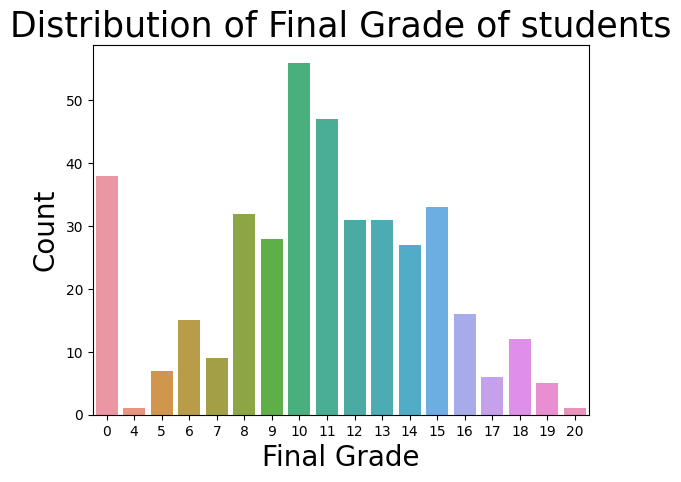

In [14]:
#data visualization
plot=sns.countplot(x=student_data['G3'],)
plot.axes.set_title('Distribution of Final Grade of students', fontsize=25)
plot.set_xlabel('Final Grade', fontsize=20)
plot.set_ylabel('Count', fontsize=20)
plt.show()

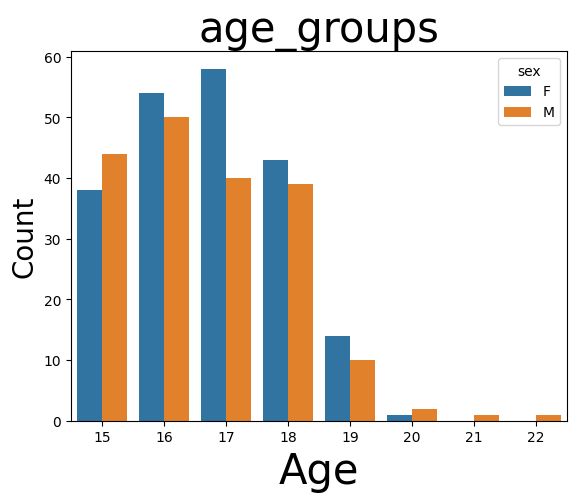

In [15]:
#visualisation age group data of student
age=sns.countplot(x='age', hue="sex",data=student_data)
age.axes.set_title('age_groups', fontsize=30)
age.set_xlabel("Age", fontsize=30)
age.set_ylabel("Count", fontsize=20)
plt.show()



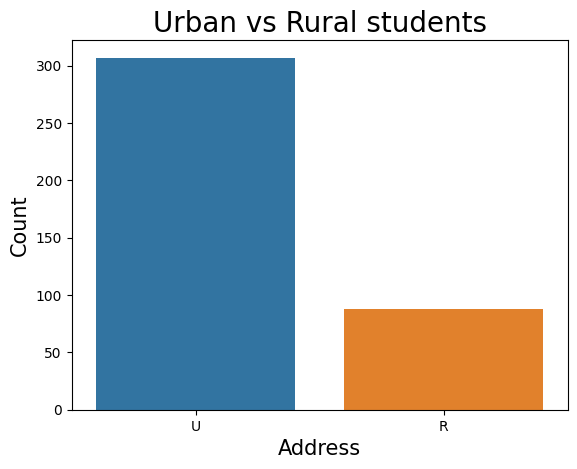

In [16]:
# Visualisation of data of student from urban and rural
home=sns.countplot(x=student_data['address'])
home.axes.set_title('Urban vs Rural students', fontsize=20)
home.set_xlabel("Address", fontsize=15)
home.set_ylabel("Count", fontsize=15)
plt.show()

In [17]:
#grade average
student_data['GradeAvg'] = (student_data['G1']) + (student_data['G2']) + (student_data['G3'])

In [18]:
student_data['GradeAvg']



0      17
1      16
2      25
3      44
4      26
       ..
390    27
391    46
392    25
393    33
394    26
Name: GradeAvg, Length: 395, dtype: int64

In [19]:
student_data['G1'].iloc[0]

5

Now we will create a grading based on Average Grade
Above 90% = Grade A
Between 70% and 90% = Grade B
Below 70% = Grade C

In [20]:
def grade_find(student_data):
  grade=[]

  for i in range(0,(student_data.shape[0])):

    GradeAvg=(student_data['G1'].iloc[i]+student_data['G2'].iloc[i]+student_data['G3'].iloc[i])/3
    if GradeAvg/20>=0.9:
      grade.append('Grade A')
    elif GradeAvg/20>=0.7 and GradeAvg/20<=0.9:
      grade.append('Grade B')
    elif GradeAvg/20<=0.7:
      grade.append('Grade C')
  student_data['GradeAvg']=grade
  return student_data



In [21]:
grade_find(student_data)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GradeAvg
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Grade C
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Grade C
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Grade C
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Grade B
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Grade C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,Grade C
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,Grade B
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,Grade C
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,Grade C


In [22]:
new_df=grade_find(student_data)

In [23]:
#processing of data: removing school and age column, which has no relevant use in model.
new_df.drop(['school','age'], axis=1, inplace=True)

In [24]:
new_df.head()

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GradeAvg
0,F,U,GT3,A,4,4,at_home,teacher,course,mother,...,3,4,1,1,3,6,5,6,6,Grade C
1,F,U,GT3,T,1,1,at_home,other,course,father,...,3,3,1,1,3,4,5,5,6,Grade C
2,F,U,LE3,T,1,1,at_home,other,other,mother,...,3,2,2,3,3,10,7,8,10,Grade C
3,F,U,GT3,T,4,2,health,services,home,mother,...,2,2,1,1,5,2,15,14,15,Grade B
4,F,U,GT3,T,3,3,other,other,home,father,...,3,2,1,2,5,4,6,10,10,Grade C


In [25]:
#mapping of yes/no values into categorical value:

categorical_value={'yes':1, 'no':0}
new_df['schoolsup']=new_df['schoolsup'].map(categorical_value)
new_df['famsup']=new_df['famsup'].map(categorical_value)
new_df['paid']=new_df['paid'].map(categorical_value)
new_df['activities']=new_df['activities'].map(categorical_value)
new_df['nursery']=new_df['nursery'].map(categorical_value)
new_df['higher']=new_df['higher'].map(categorical_value)
new_df['internet']=new_df['internet'].map(categorical_value)
new_df['romantic']=new_df['romantic'].map(categorical_value)

In [26]:
new_df['internet']

0      0
1      1
2      1
3      1
4      0
      ..
390    0
391    1
392    0
393    1
394    1
Name: internet, Length: 395, dtype: int64

In [27]:
#mapping of different columns into categorical value:

In [28]:
categorical_d={'F':1, 'M': 0}
new_df['sex']=new_df['sex'].map(categorical_d)

In [29]:
categorical_d={'U':1, 'R': 0}
new_df['address']=new_df['address'].map(categorical_d)

In [30]:
categorical_d={'LE3':1, 'GT3': 0}
new_df['famsize']=new_df['famsize'].map(categorical_d)

In [31]:
categorical_d={'T':1, 'A': 0}
new_df['Pstatus']=new_df['Pstatus'].map(categorical_d)

In [32]:
categorical_d={'teacher':0, 'health': 1, 'services':2, 'at_home':3, 'other':4}
new_df['Mjob']=new_df['Mjob'].map(categorical_d)
new_df['Fjob']=new_df['Fjob'].map(categorical_d)

In [33]:
categorical_d={'home':0, 'reputation': 1, 'course':2, 'other':3}
new_df['reason']=new_df['reason'].map(categorical_d)

In [34]:
categorical_d={'mother':0, 'father': 1, 'other':2}
new_df['guardian']=new_df['guardian'].map(categorical_d)

In [35]:
categorical_d={'Grade A':1, 'Grade B': 2, 'Grade C':3}
new_df['GradeAvg']=new_df['GradeAvg'].map(categorical_d)

In [36]:
new_df['guardian']

0      0
1      1
2      0
3      0
4      1
      ..
390    2
391    0
392    2
393    0
394    1
Name: guardian, Length: 395, dtype: int64

In [37]:
new_df.columns

Index(['sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'GradeAvg'],
      dtype='object')

In [38]:
# define x and y:
y=new_df['G3']
x=new_df.drop('G3',axis=1)

In [39]:
#split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state=44)

In [40]:
#verify shape
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((316, 31), (79, 31), (316,), (79,))

In [41]:
#select model
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [42]:
#train model
model.fit(x_train,y_train)

LinearRegression()

In [43]:
#predict with model
y_pred=model.predict(x_test)

In [44]:
#accuracy of model
print(model.score(x_test, y_test))

0.8520089607486967


In [45]:
#model evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [46]:
#model MAE
mean_absolute_error(y_test,y_pred)

1.3178114345489362

In [47]:
#model MSE
mean_squared_error(y_test,y_pred)

3.300904442867876

In [48]:
#future prediction
sample=new_df.sample(3)
sample

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GradeAvg
145,1,1,0,1,1,1,4,2,2,1,...,4,2,1,2,5,0,8,11,11,3
28,0,1,1,0,3,4,2,4,0,0,...,3,3,1,1,5,4,11,11,11,3
93,1,1,0,1,4,2,0,2,0,0,...,3,3,1,1,1,0,11,10,10,3


In [49]:
#define x_new
x_new=sample.loc[:,x.columns]
x_new

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,GradeAvg
145,1,1,0,1,1,1,4,2,2,1,...,4,4,2,1,2,5,0,8,11,3
28,0,1,1,0,3,4,2,4,0,0,...,5,3,3,1,1,5,4,11,11,3
93,1,1,0,1,4,2,0,2,0,0,...,5,3,3,1,1,1,0,11,10,3


In [50]:
#predict for x_new
model.predict(x_new)

array([10.1568481 , 11.69446629,  9.28565431])